In [309]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_colwidth', None)

df = pd.read_csv("day.csv", low_memory=False, index_col='instant')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Making data more readable for quick analysis


In [310]:
seasons = ['spring', 'summer', 'fall', 'winter']
years = [2018, 2019]
weather = ['sunny', 'cloudy', 'rainy', 'storm']

In [311]:
s_conditions = [df['season']==1, df['season'] ==2, df['season'] ==3, df['season'] ==4]
y_conditions = [df['yr']==0, df['yr']==1]
w_conditions = [df['weathersit']==1, df['weathersit']==2, df['weathersit']==3, df['weathersit']==4]

In [312]:
df['season'] = np.select(s_conditions, seasons, default=df['season'])
df['yr'] =  np.select(y_conditions, years, default=df['yr'])
df['weathersit'] =  np.select(w_conditions, weather, default=df['weathersit'])
df['holiday'] = df['holiday'] == 1
df['workingday'] = df['workingday'] == 1

In [313]:
df['temp'] = df['temp'].astype(int)
df['atemp'] = df['atemp'].astype(int)
df['hum'] = df['hum'].astype(int)
df['windspeed'] = df['windspeed'].astype(int)
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [314]:


weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

df['weekday'] = df['weekday'].map(weekday_mapping)

In [315]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map month numbers to month names
df['mnth'] = df['mnth'].map(month_mapping)

In [316]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,spring,2018,January,False,Saturday,False,cloudy,14,18,80,10,331,654,985
2,2018-01-02,spring,2018,January,False,Sunday,False,cloudy,14,17,69,16,131,670,801
3,2018-01-03,spring,2018,January,False,Monday,True,sunny,8,9,43,16,120,1229,1349
4,2018-01-04,spring,2018,January,False,Tuesday,True,sunny,8,10,59,10,108,1454,1562
5,2018-01-05,spring,2018,January,False,Wednesday,True,sunny,9,11,43,12,82,1518,1600


## Analysing columns relation with count

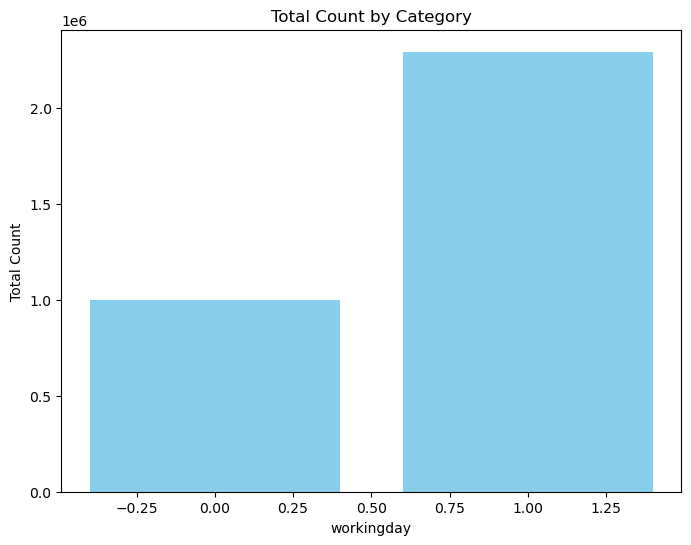

In [317]:
grouped_data = df.groupby('workingday')['cnt'].sum().reset_index()

# Plot the relationship
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['workingday'], grouped_data['cnt'], color='skyblue')
plt.xlabel('workingday')
plt.ylabel('Total Count')
plt.title('Total Count by Category')
plt.show()

More people take bikes on a working day (maybe to commute to work)

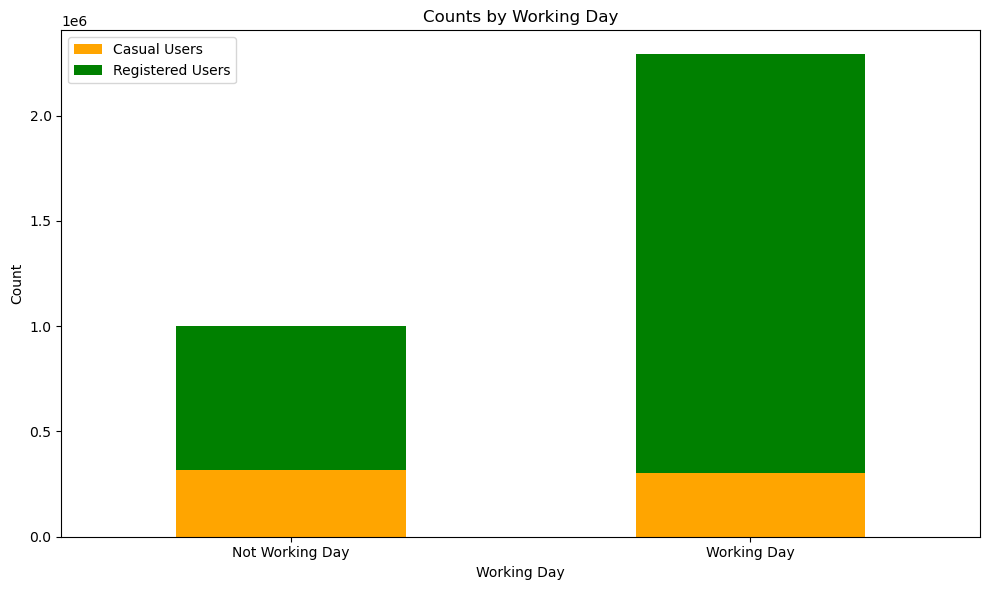

In [318]:
grouped_data = df.groupby('workingday')[['casual', 'registered']].sum()

# Plot the counts
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Counts by Working Day')
plt.xticks([0, 1], ['Not Working Day', 'Working Day'], rotation=0)
plt.legend(['Casual Users', 'Registered Users', 'Total Count'])
plt.tight_layout()
plt.show()

## Conclusion: There are working people who has registered as they need to use bikes to commute to office 

## Analysing weather


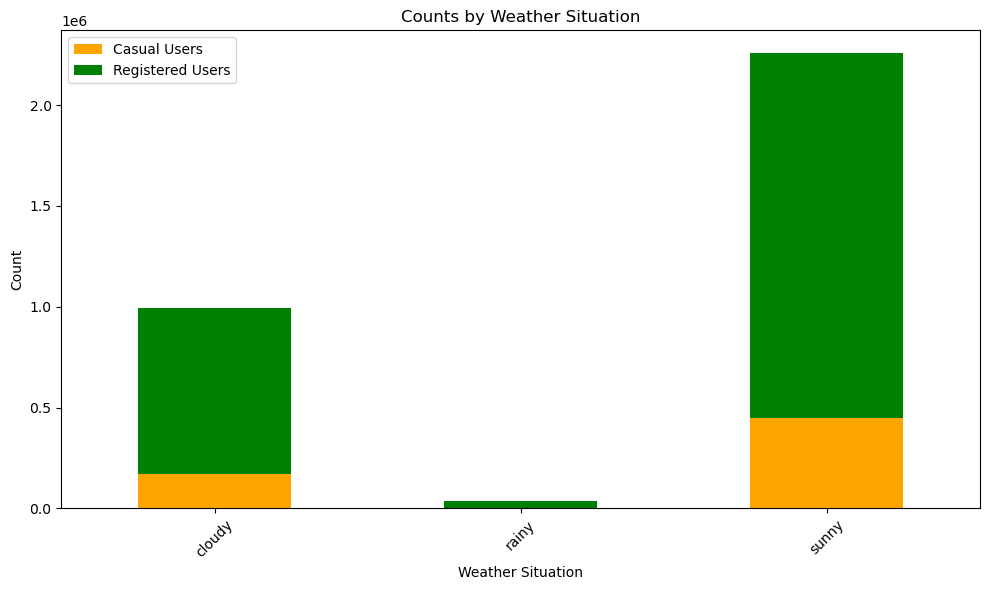

In [319]:
grouped_data = df.groupby('weathersit')[['casual', 'registered']].sum()

# Plot the counts
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.title('Counts by Weather Situation')
plt.xticks(rotation=45)
plt.legend(['Casual Users', 'Registered Users', 'Total Count'])
plt.tight_layout()
plt.show()

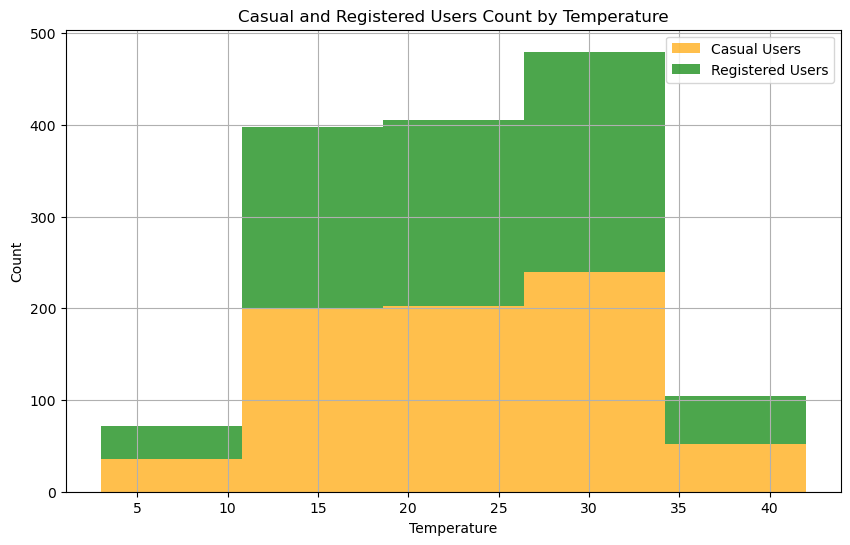

In [320]:
plt.figure(figsize=(10, 6))
plt.hist([df['atemp'], df['atemp']], bins=5, alpha=0.7, label=['Casual Users', 'Registered Users'], color=['orange', 'green'], stacked=True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Casual and Registered Users Count by Temperature')
plt.legend()
plt.grid(True)
plt.show()

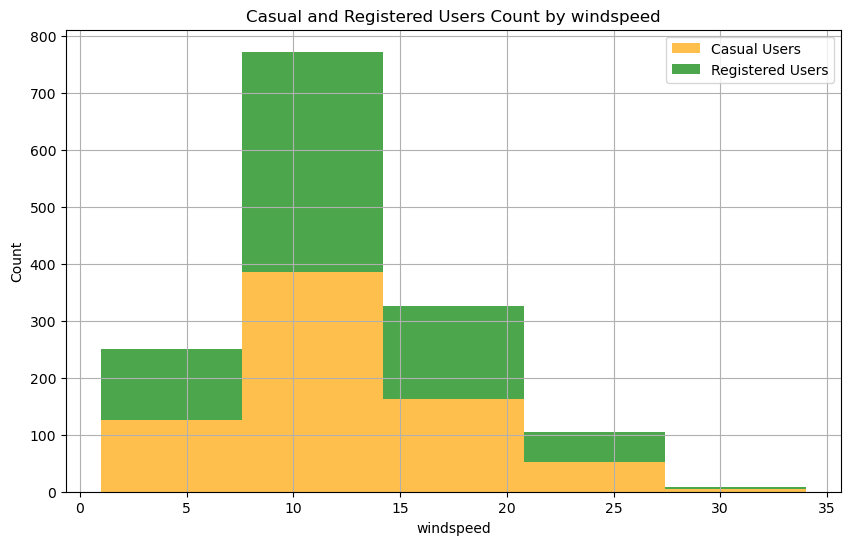

In [321]:
plt.figure(figsize=(10, 6))
plt.hist([df['windspeed'], df['windspeed']], bins=5, alpha=0.7, label=['Casual Users', 'Registered Users'], color=['orange', 'green'], stacked=True)
plt.xlabel('windspeed')
plt.ylabel('Count')
plt.title('Casual and Registered Users Count by windspeed')
plt.legend()
plt.grid(True)
plt.show()


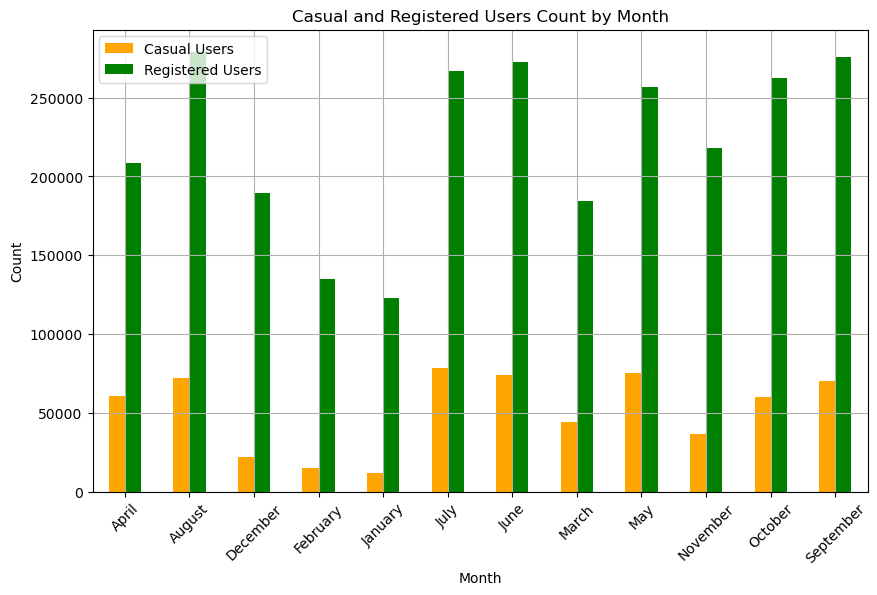

In [323]:

grouped_data = df.groupby('mnth')[['casual', 'registered']].sum()


grouped_data.plot(kind='bar', figsize=(10, 6), color=['orange', 'green'])

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Casual and Registered Users Count by Month')
plt.xticks(rotation=45)
plt.legend(['Casual Users', 'Registered Users'])
plt.grid(True)
plt.show()


## Reding data again to remove outliers 

In [324]:
df = pd.read_csv("day.csv", low_memory=False, index_col='instant')

registered_column = df['registered']


Q1 = registered_column.quantile(0.25)
Q3 = registered_column.quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(registered_column >= lower_bound) & (registered_column <= upper_bound)]

In [325]:
df = df[(df['workingday'].isin([0, 1])) & (df['holiday'].isin([0, 1]))]


## training on 'temp','hum','windspeed', 'holiday', 'weekday', 'season', 'weathersit', 'yr'

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df[['atemp','hum','windspeed', 'holiday', 'weekday','season', 'weathersit', 'yr']]
y = df['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [341]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.843053728239126

## If we add casual and registers user count to train, it will overfit the model 

##  linearity check

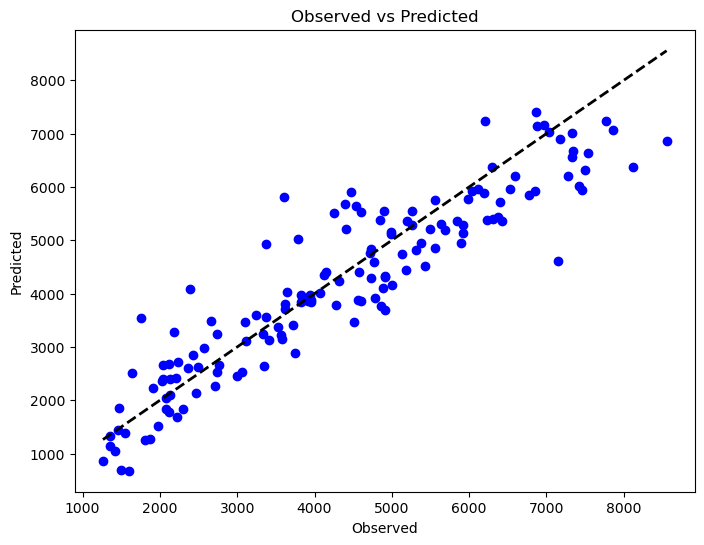

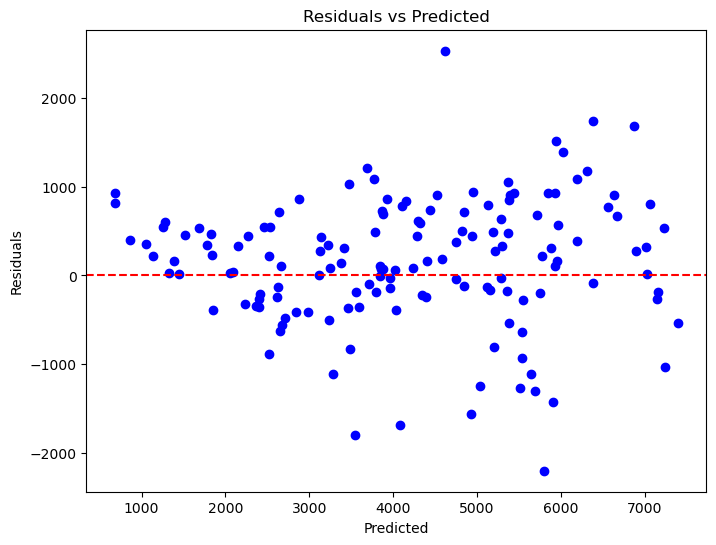

In [344]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted')
plt.show()

# Plotting residuals vs predicted values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Plotting the horizontal line at y=0
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
